### **BTC Forecasting**
<p align='justify'>
By using the dataset of Bitcoin price, we will try to predict the future price. The model will be trained using the previous 30 days data and then it will be tested on the next day. The accuracy of the model will be measured by evalutation metrics. Using the model reviewed in the linear_regression.ipynb, the following section will be the implementation of this model.

In [2]:
# Load dataset
import pandas as pd

df = pd.read_csv('./BTC-Daily.csv')

# Remove duplicate rows
df = df.drop_duplicates()

# Skim through data
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651 entries, 0 to 2650
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   unix        2651 non-null   int64  
 1   date        2651 non-null   object 
 2   symbol      2651 non-null   object 
 3   open        2651 non-null   float64
 4   high        2651 non-null   float64
 5   low         2651 non-null   float64
 6   close       2651 non-null   float64
 7   Volume BTC  2651 non-null   float64
 8   Volume USD  2651 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 186.5+ KB
None


,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646092800,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06
1,1646006400,2022-02-28 00:00:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
2,1645920000,2022-02-27 00:00:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07
3,1645833600,2022-02-26 00:00:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07
4,1645747200,2022-02-25 00:00:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07


2014-11-28 to 2022-03-01


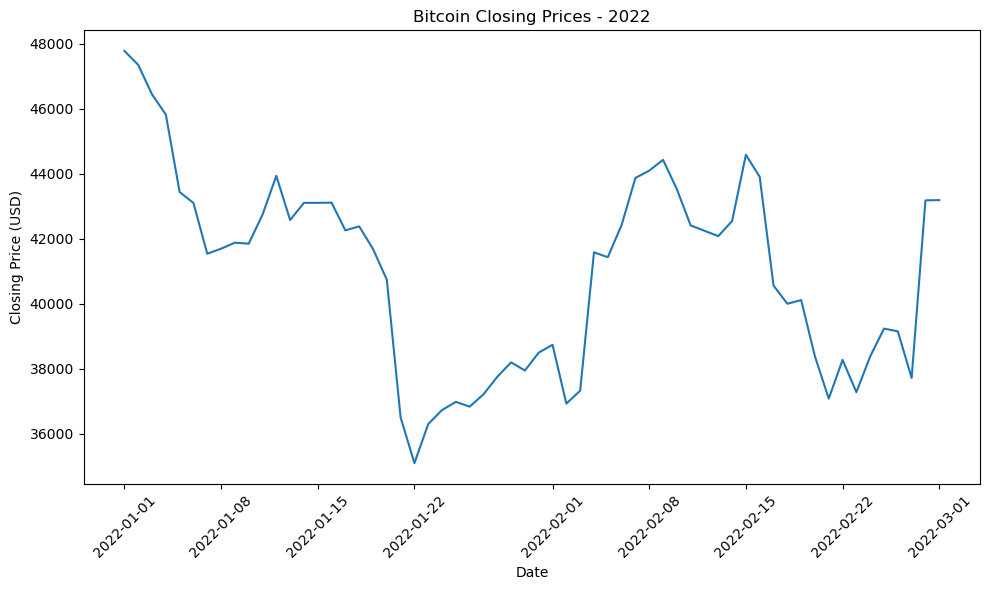

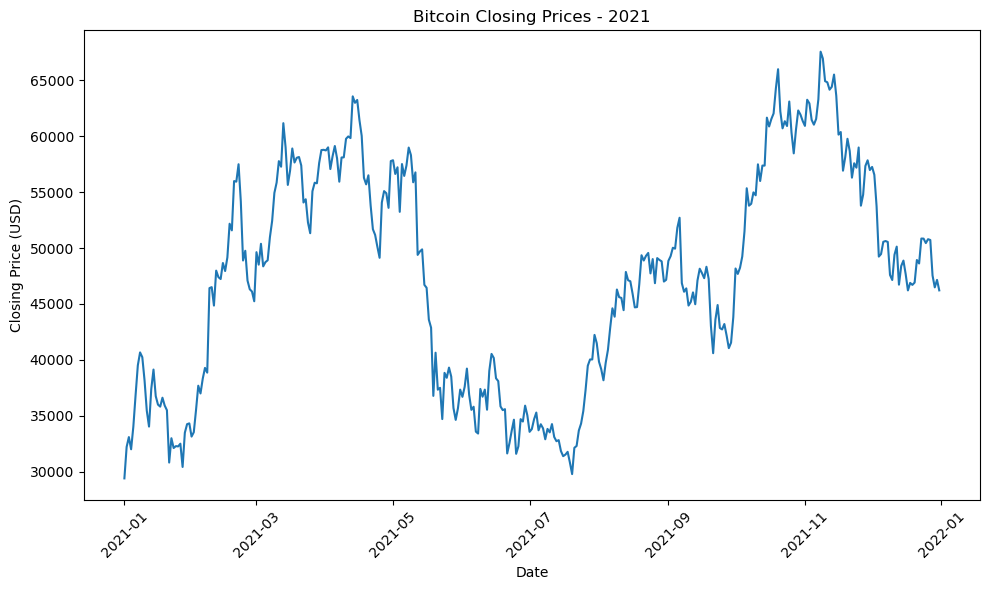

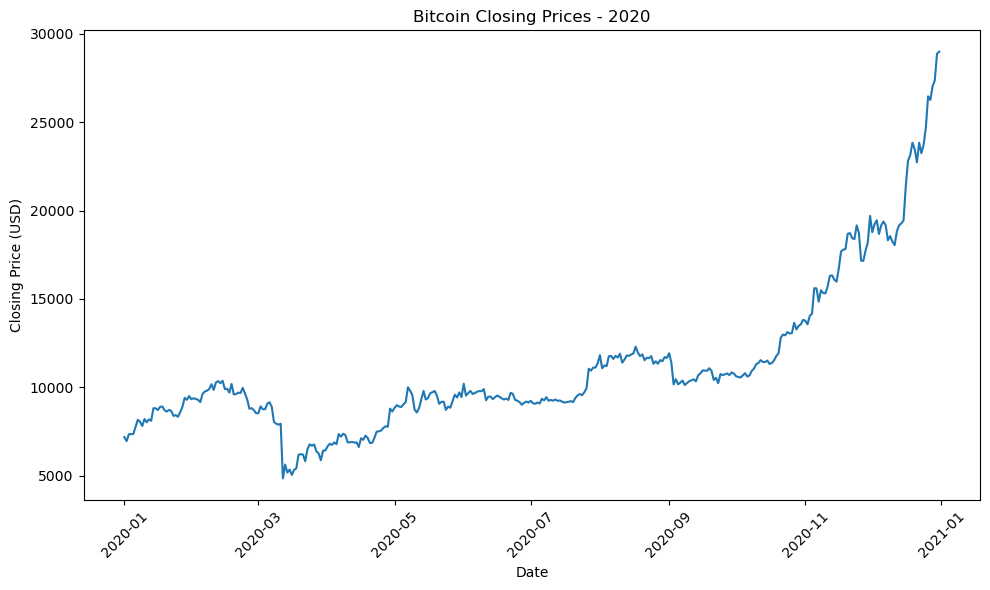

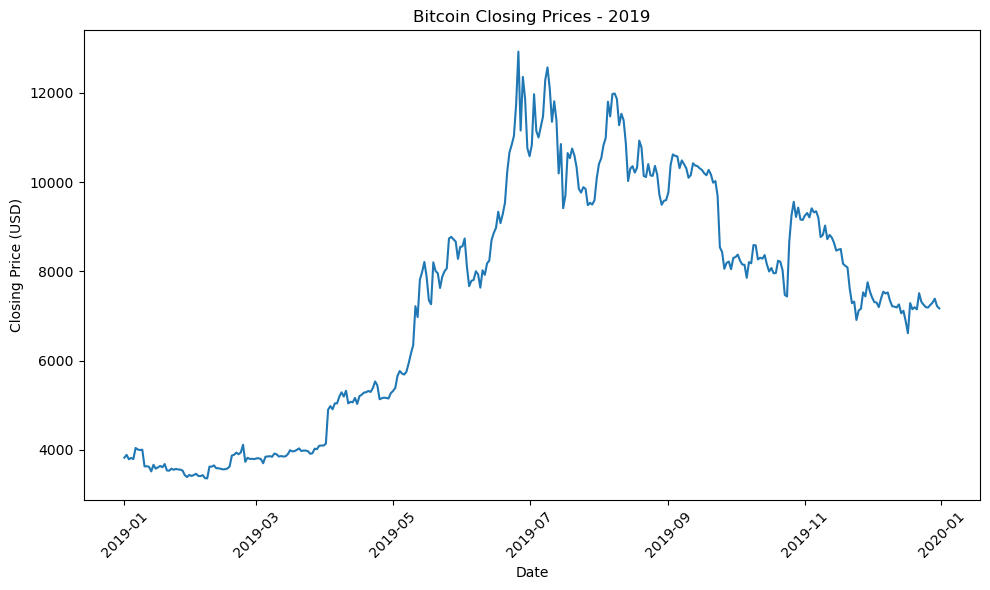

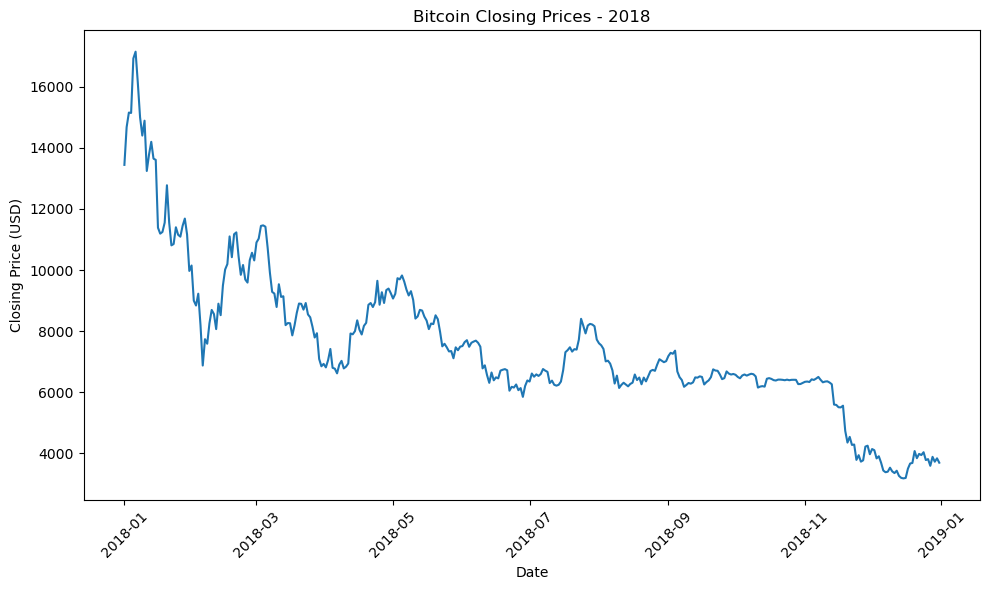

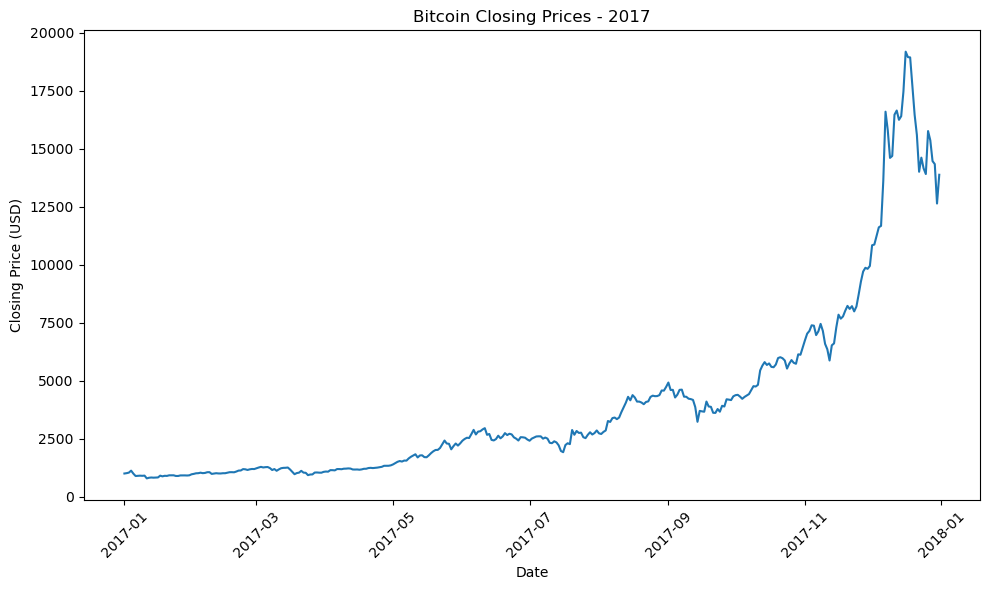

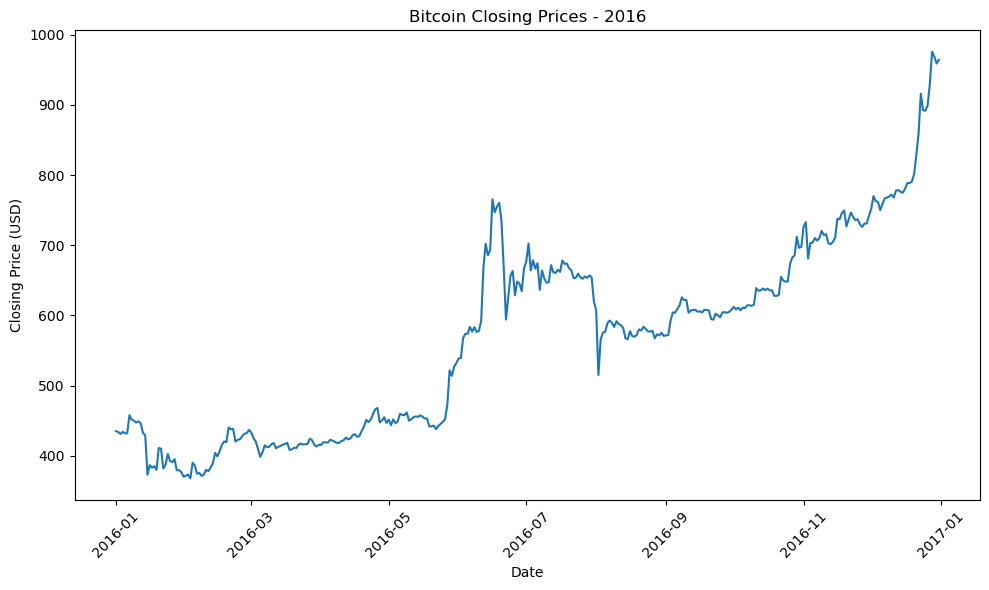

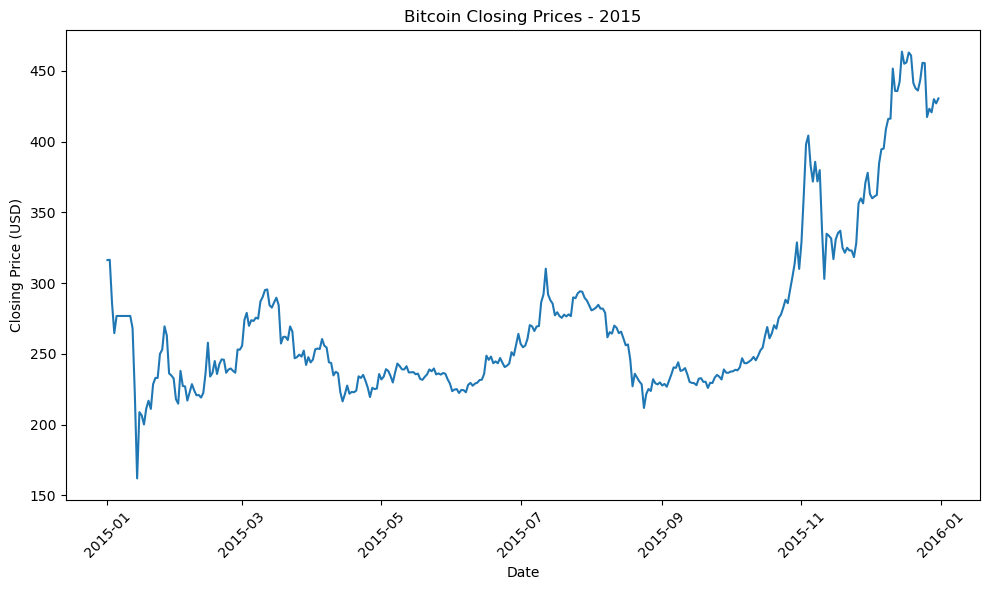

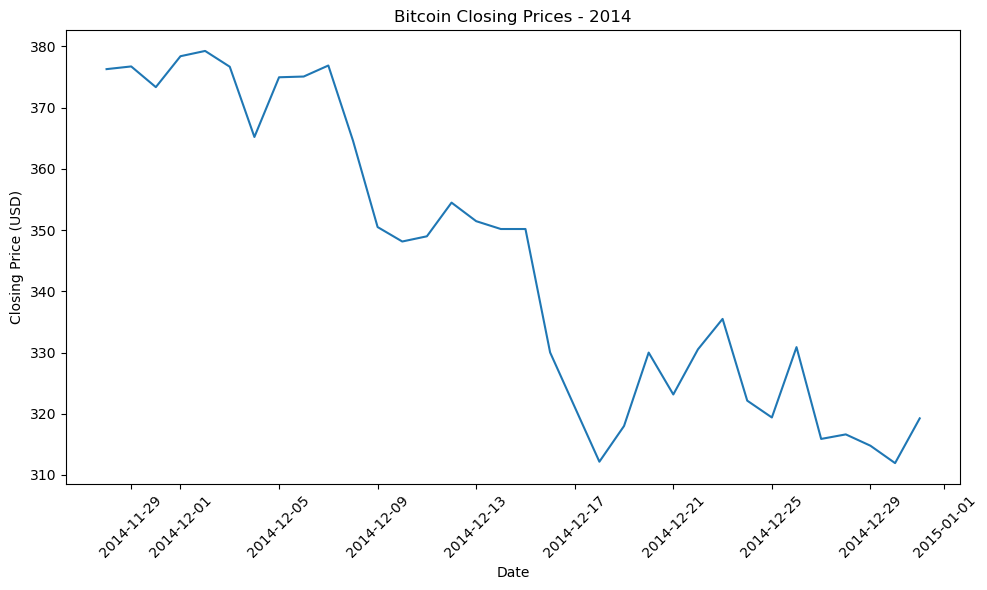

In [3]:
import matplotlib.pyplot as plt

# Convert date to datetime format
df['date'] = pd.to_datetime(df['date'])
date_range = str(df['date'].dt.date.min()) + ' to ' + str(df['date'].dt.date.max())
print(date_range)

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

unique_years = df['year'].unique()
for year in unique_years:
    dates = pd.date_range(start=f'{year}-01-01', end=f'{year}-12-31', freq='D')
    year_month_day = pd.DataFrame({'date': dates})
    year_month_day['year'] = year_month_day['date'].dt.year
    year_month_day['month'] = year_month_day['date'].dt.month
    year_month_day['day'] = year_month_day['date'].dt.day
    
    merged_data = pd.merge(year_month_day, df, on=['year', 'month', 'day'], how='left')
    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(merged_data['date_x'], merged_data['close'])
    plt.title(f'Bitcoin Closing Prices - {year}')
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()  

#### Candlestick graph from 2019 - 2022

In [4]:
%pip install mplfinance

   ---------------------------------------- 0.0/75.0 kB ? eta -:--:--
   ---------------- ----------------------- 30.7/75.0 kB 660.6 kB/s eta 0:00:01
   ---------------------------------------- 75.0/75.0 kB 1.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


C:\Users\DHPC\AppData\Local\Temp\ipykernel_20044\2679876294.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = df_filtered['date'].map(mdates.date2num)


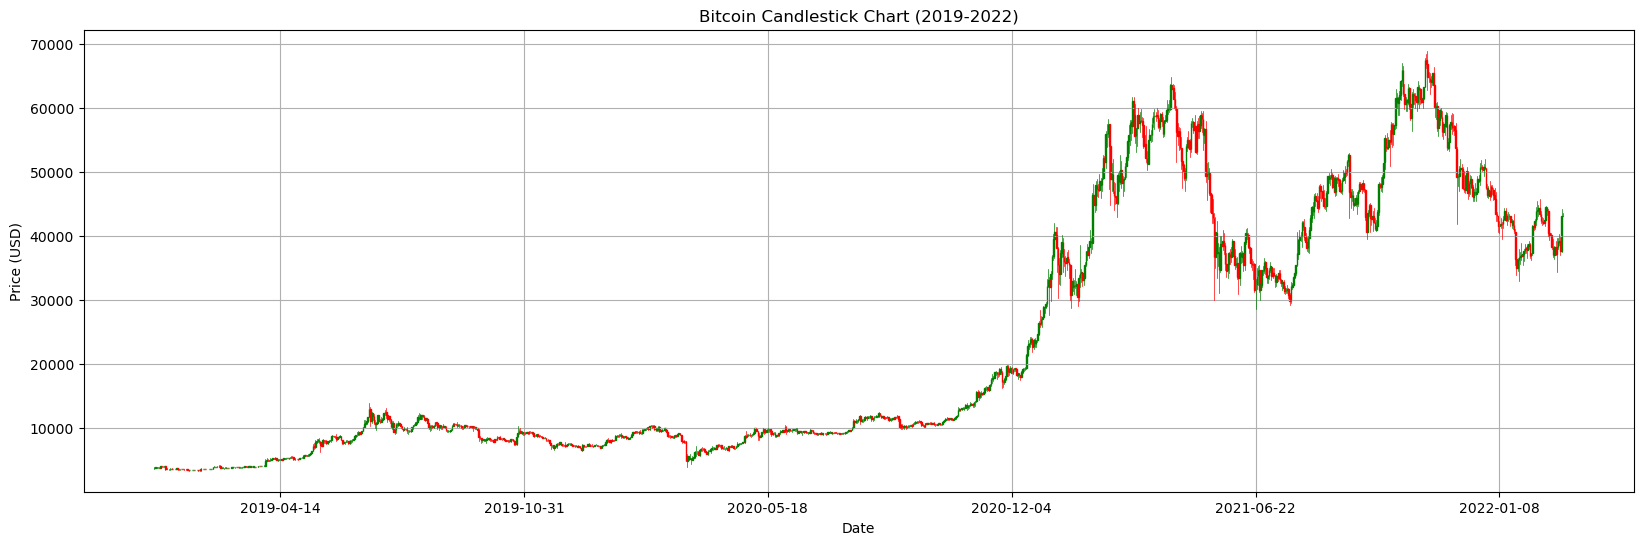

In [7]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc
import datetime

# Filter data for 2019 - 2022
df_filtered = df[(df['date'] >= '2019-01-01') & (df['date'] <= '2022-12-31')]

# Convert date to matplotlib format
df_filtered['date'] = df_filtered['date'].map(mdates.date2num)

# Create the candlestick chart
fig, ax = plt.subplots(figsize=(20, 6))
candlestick_ohlc(ax, df_filtered[['date', 'open', 'high', 'low', 'close']].values, width=0.6, colorup='g', colordown='r')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.title('Bitcoin Candlestick Chart (2019-2022)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)

# Save the plot as a PDF
plt.savefig('bitcoin_candlestick_2019_2022.pdf')
plt.show()

#### Linear Regression Model

In [16]:
import numpy as np

def predict(X, w, b):
    return X.dot(w) + b

def gradient(y_hat, y, x):
    loss = y_hat - y
    dw = x.T.dot(loss) / len(y)
    db = np.sum(loss) / len(y)
    cost = np.sum(loss**2)/(2*len(y))
    return (dw, db, cost)

def update_weight(w, b, lr, dw, db):
    w_new = w - lr * dw
    b_new = b - lr * db
    return (w_new, b_new)

def linear_regression_vectorized(X, y, learning_rate=0.01, num_iterations=200):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    b = 0
    losses = []
    
    for i in range(num_iterations):
        y_hat = predict(X, w, b)
        dw, db, cost = gradient(y_hat, y, X)
        w, b = update_weight(w, b, learning_rate, dw, db)
        losses.append(cost)
        
    return w, b, losses

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scalar = StandardScaler()

df["Standardized_Closed_Prices"] = scalar.fit_transform(df["close"].values.reshape(-1, 1))
df["Standardized_Open_Prices"] = scalar.fit_transform(df["open"].values.reshape(-1, 1))
df["Standardized_High_Prices"] = scalar.fit_transform(df["high"].values.reshape(-1, 1))
df["Standardized_Low_Prices"] = scalar.fit_transform(df["low"].values.reshape(-1, 1))

# Convert date to numerical format
df['date_str'] = df['date'].dt.strftime('%Y%m%d%H%M%S')

# Convert the string date to a numerical format
df['NumericalDate'] = pd.to_numeric(df['date_str'])

# Drop the intermediate 'date_str' column
df.drop(columns=['date_str'], inplace=True)

X = df[["Standardized_Open_Prices", "Standardized_High_Prices", "Standardized_Low_Prices"]]
y = df["Standardized_Closed_Prices"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

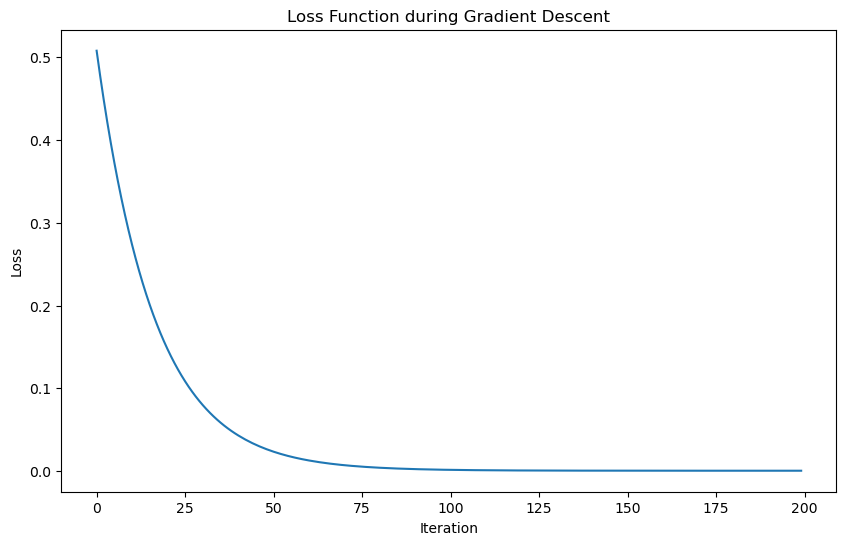

In [20]:
# Training the model
lr = 0.01
epochs = 200
b = 0
w = np.zeros(X_train.shape[1])
w, b, losses = linear_regression_vectorized(X_train.values, y_train.values, lr, epochs)

# Plot the loss function
plt.figure(figsize=(10, 6))
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Function during Gradient Descent')
plt.show()

In [21]:
# Model Evaluation
from sklearn.metrics import r2_score

# Make predictions on the test set
y_pred = predict(X_test, w, b)

# Calculate RMSE
rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))

# Calculate MAE
mae = np.mean(np.abs(y_pred - y_test))

# Calculate MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Calculate R2 on training data
y_train_pred = predict(X_train, w, b)
train_accuracy = r2_score(y_train, y_train_pred)

# Calculate R2 on testing data
test_accuracy = r2_score(y_test, y_pred)

print("Root Mean Square Error (RMSE): ", round(rmse, 4))
print("Mean Absolute Error (MAE): ", round(mae, 4))
print("Mean Absolute Percentage Error (MAPE): ", round(mape, 2), "%")
print("Training Accuracy (R-squared): ", round(train_accuracy, 4))
print("Testing Accuracy (R-squared): ", round(test_accuracy, 4))

Root Mean Square Error (RMSE):  0.0293
Mean Absolute Error (MAE):  0.0138
Mean Absolute Percentage Error (MAPE):  5.83 %
Training Accuracy (R-squared):  0.9989
Testing Accuracy (R-squared):  0.9991


#### Inference: Testing model in price from 01/01/2019 - 01/04/2019

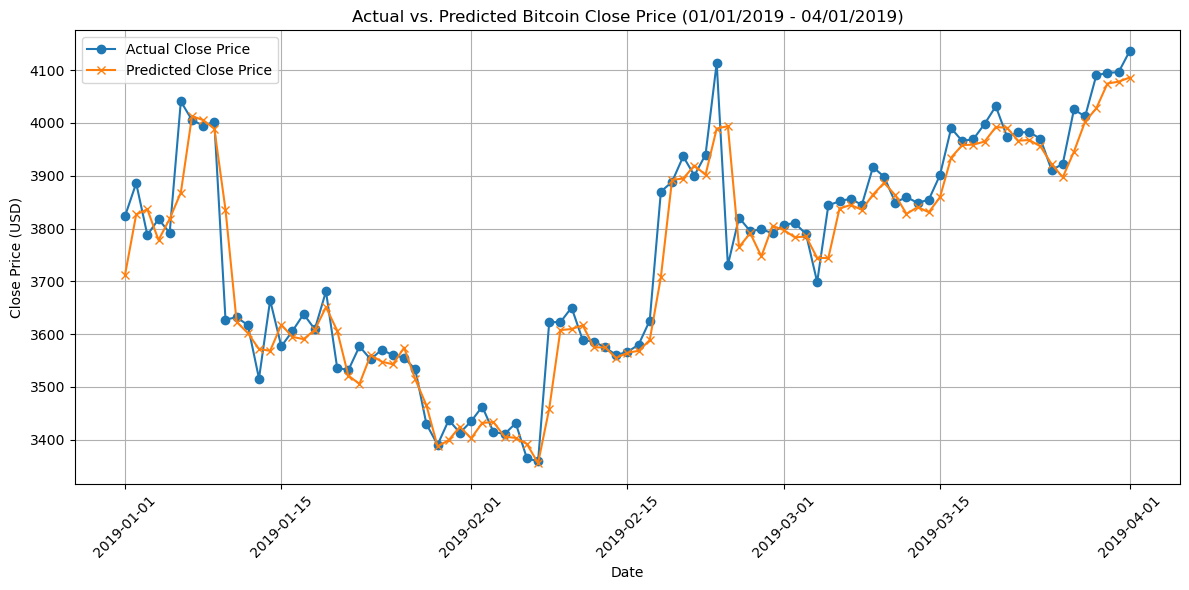

In [23]:
# Filter data for 2019-01-01 to 2019-04-01
df_2019_q1 = df[(df['date'] >= '2019-01-01') & (df['date'] <= '2019-04-01')]

# Prepare X and y for prediction
X_2019_q1 = df_2019_q1[["open", "high", "low"]]
y_2019_q1_actual = df_2019_q1["close"]

y_2019_q1_pred = predict(X_2019_q1, w, b)

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(df_2019_q1['date'], y_2019_q1_actual, label='Actual Close Price', marker='o')
plt.plot(df_2019_q1['date'], y_2019_q1_pred, label='Predicted Close Price', marker='x')
plt.title('Actual vs. Predicted Bitcoin Close Price (01/01/2019 - 04/01/2019)')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()